[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/combine-org/combine-notebooks/main?labpath=notebooks%2Fcellml.ipynb)
<a href="https://colab.research.google.com/github/combine-org/combine-notebooks/blob/main/notebooks/cellml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab\"/></a>

# Simple CellML example


This notebook creates a simple model in [CellML version 2](https://www.cellml.org/specifications/cellml_2.0/cellml_2_0_normative_specification.pdf) for illustration.  It is based on the libCellML tutorial series which can found [here](https://libcellml.org/documentation/v0.4.0/user/tutorials/index).

## 1) Including libraries

In [1]:
from libcellml import Analyser, Component, Model, Printer, Units, Validator, Variable, cellmlElementTypeAsString
from combine_notebooks.cellml_utilities import print_model, print_issues
from combine_notebooks import RESULTS_DIR

## 2) Declaring the CellML model

The first step is to create a Model item which will later contain the component and the units it needs.

In [2]:
model = Model()

Each CellML element must have a name, which is set using the setName() function.

In [3]:
model.setName('tutorial_1_model')
model.setId('tutorial_1_model_id_is_here')

We'll create a wrapper component whose only job is to encapsulate the other components. This makes is a lot easier for this model to be reused, as the connections between components internal to this one won't need to be re-established. Note that the constructor for all named CellML entities is overloaded, so you can pass it the name string at the time of creation.

In [4]:
component = Component('i_am_a_component')
component.setId('my_component_id')

Finally we need to add the component to the model.  This sets it at the top-level of 
the components' encapsulation hierarchy.  All other components need to be added 
to this component, rather than the model.

In [5]:
model.addComponent(component)

True

 In order to actually model anything, we need to include the mathematical equations which represent the physical situation of interest.  To do this we will start by creating the variables $a$, $b$, and $c$.

In [6]:
a = Variable("a")
a.setUnits("dimensionless")
a.setInitialValue("b")
a.setInterfaceType("public_and_private")
component.addVariable(a)

b = Variable("b")
b.setUnits("dimensionless")
b.setInterfaceType("public_and_private")
component.addVariable(b)

c = Variable("c")
c.setUnits("dimensionless")
c.setInterfaceType("public_and_private")
component.addVariable(c)

print_model(model)

MODEL: 'tutorial_1_model', id: 'tutorial_1_model_id_is_here'
    UNITS: 0 custom units
    COMPONENTS: 1 components
        [0]: 'i_am_a_component', id: 'my_component_id'
            VARIABLES: 3 variables
                [0]: a [dimensionless], initial = b
                [1]: b [dimensionless]
                [2]: c [dimensionless]


Equations are modelled using MathML2 strings.  Here we are create MathML to model the simple equation ; $ a = b + c $.

In [7]:
# Add the header and footer strings.
math_header = '<math xmlns="http://www.w3.org/1998/Math/MathML" xmlns:cellml="http://www.cellml.org/cellml/2.0#">'
math_footer = '</math>'

# Create the MathML2 string representing the governing equations.  
equation1 = \
    "   <apply>"\
    "       <eq/>"\
    "       <ci>a</ci>"\
    "       <apply>"\
    "           <plus/>"\
    "           <ci>b</ci>"\
    "           <ci>c</ci>"\
    "       </apply>"\
    "   </apply>"

Include the MathML strings in the component.

In [8]:
component.setMath(math_header)
component.appendMath(equation1)
component.appendMath(math_footer)

## 3) Write, print and validate the generated model

Print the model to using the print_model helper function and 
check it is what you'd expect.

In [9]:
print_model(model)

MODEL: 'tutorial_1_model', id: 'tutorial_1_model_id_is_here'
    UNITS: 0 custom units
    COMPONENTS: 1 components
        [0]: 'i_am_a_component', id: 'my_component_id'
            VARIABLES: 3 variables
                [0]: a [dimensionless], initial = b
                [1]: b [dimensionless]
                [2]: c [dimensionless]


Create a validator and use it to check the model for issues.

In [10]:
validator = Validator()
validator.validateModel(model)
print_issues(validator)

Recorded 0 issues!



Save the model to a .cellml file and print the raw cellml text.

In [11]:
printer = Printer()
serialised_model = printer.printModel(model)
# Write the serialised string to a file.
file_loc = str(RESULTS_DIR) + "/hello_world_cellml.cellml"
write_file = open(file_loc, "w")
write_file.write(serialised_model)
xml = open(file_loc).read()
print(xml)

## 4) Simulating the model

---  load using roadrunner ---


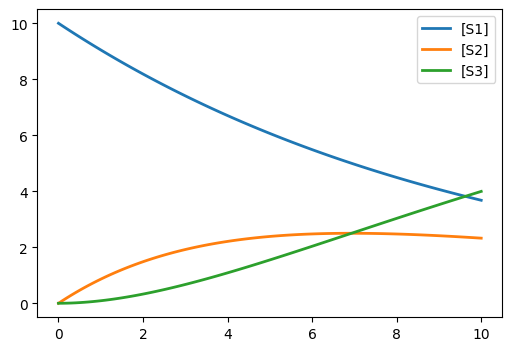

NotImplementedError: CellML support was not compiled into Antimony, so conversion is not available.

In [17]:
import tellurium as te

# Load an antimony model
ant_model = '''
    S1 -> S2; k1*S1;
    S2 -> S3; k2*S2;

    k1= 0.1; k2 = 0.2;
    S1 = 10; S2 = 0; S3 = 0;
'''
# At the most basic level one can load the SBML model directly using libRoadRunner
print('---  load using roadrunner ---')
import roadrunner
# convert to SBML model
sbml_model = te.antimonyToSBML(ant_model)
r = roadrunner.RoadRunner(sbml_model)
result = r.simulate(0, 10, 100)
r.plot(result)
cellml_model = te.sbmlToCellML(sbml_model)

# The method loada is simply a shortcut to loadAntimonyModel
print('---  load using tellurium ---')
r = te.loada(ant_model)
result = r.simulate (0, 10, 100)
r.plot(result)

# same like
r = te.loadAntimonyModel(ant_model)

In [19]:
import tellurium as te
import tempfile

# load model
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 10')
# file for export
f_cellml = tempfile.NamedTemporaryFile(suffix=".cellml")

# export current model state
r.exportToCellML(f_cellml.name)

# to export the initial state when the model was loaded
# set the current argument to False
r.exportToCellML(f_cellml.name, current=False)

# The string representations of the current model are available via
str_cellml = r.getCurrentCellML()

# and of the initial state when the model was loaded via
str_cellml = r.getCellML()
print(str_cellml)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\HARVEY~1\\AppData\\Local\\Temp\\tmp94bj3937.cellml'

In [1]:
import tellurium as te

# antimony model
ant_model = """
    S1 -> S2; k1*S1;
    S2 -> S3; k2*S2;

    k1= 0.1; k2 = 0.2;
    S1 = 10; S2 = 0; S3 = 0;
"""

# convert to SBML
sbml_model = te.antimonyToSBML(ant_model)
print('sbml_model')
print('*'*80)
# print first 10 lines
for line in list(sbml_model.splitlines())[:10]:
    print(line)
print('...')

# convert to CellML
cellml_model = te.antimonyToCellML(ant_model)
print('cellml_model (from Antimony)')
print('*'*80)
# print first 10 lines
for line in list(cellml_model.splitlines())[:10]:
    print(line)
print('...')

# or from the sbml
cellml_model = te.sbmlToCellML(sbml_model)
print('cellml_model (from SBML)')
print('*'*80)
# print first 10 lines
for line in list(cellml_model.splitlines())[:10]:
    print(line)
print('...')

sbml_model
********************************************************************************
<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by libAntimony version v2.13.2 with libSBML version 5.19.5. -->
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model metaid="__main" id="__main">
    <listOfCompartments>
      <compartment sboTerm="SBO:0000410" id="default_compartment" spatialDimensions="3" size="1" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="S1" compartment="default_compartment" initialConcentration="10" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="S2" compartment="default_compartment" initialConcentration="0" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
...


AttributeError: module 'antimony' has no attribute 'getCellMLString'